In [2]:
import cv2
import numpy as np
from tqdm import notebook
import skvideo.io

In [3]:
height = 512
width = 512
frames = 600
fps = 120
seconds = np.ceil(frames/fps).astype(int)
col_width = 20
object_radius = 18

In [4]:
video_frames = np.zeros(shape=(fps * seconds, height, width), dtype=np.int32)
placeholder = np.zeros(shape=(512 + fps * seconds, height, width), dtype=np.int32)

# path = cv2.circle(np.zeros((height, width)), (256, 256), radius=200, color=(255,255,255))

# discreet path along circle of radius 10
# all these extra numbers are for transformations that make the circle centered and line up and such
path_indices = (
    np.rint(np.linspace(156, 356, 300)).astype(int),
    np.rint(np.sqrt(100**2 - (np.linspace(156, 356, 300) -256)**2) + 256).astype(int)
)
path_indices_2 = (
    np.rint(np.linspace(156, 356, 300)).astype(int),
    (-1 * np.rint(np.sqrt(100**2 - ((np.linspace(156, 356, 300)) -256)**2)).astype(int)) + 256
)


# 600 frames at 120 fps is 5 seconds of video
populated = False # set to true when the first column reaches the other side
counter = 0

# 512 is to account for the time for the first column to reach other side
for i in range(512 + fps * seconds):

    # set counter to 0 every 16 frames
    if i % 8 == 0 and counter != 8 and counter != 0:
        counter = 0

    # every 16 frames create a column
    if counter < 8:
        placeholder[i, :, 0] = 255

    # for each column of 255, move it over 1 frame
    if i > 0:
        # video_frames[i-1] is the previous frame
        indices = np.where(placeholder[i-1] == 255)

        # indices[1] is the column indices there are 265 repeats for each column,
        # therefore we use a set to remove duplicates
        cols = set(indices[1])
        cols = sorted(list(cols))

        # j is the column
        for j in range(len(cols)):
            col = cols[j]

            # erases from the tail end of the column
            # if the column, 8 to the left of the current column, is also a white column, remove it
            if col - 7 in cols and col-6 in cols:
                placeholder[i, :, col-7] = 0

            # re-add the intermediate parts of the column
            placeholder[i, :, col] = 255

            # as long as the column is not the last one, add another column next to it
            if col < width-1:
                placeholder[i, :, col+1] = 255
            else:
                if not populated:
                    populated = True
                    # print(i)

    counter += 1
# print(path_indices[0])
# print(path_indices[1])
# print((len(path_indices[0])))

video_frames = placeholder[512:fps*seconds+512]



for x, y, x_2, y_2, frame in zip(path_indices[0], path_indices[1], path_indices_2[0][::-1], path_indices_2[1][::-1], range(int(frames/2))):
    # print(f"{x}, {y}")
    # creates a rectangle at the current position
    video_frames[frame] = cv2.rectangle(video_frames[frame], (x-object_radius, int(y+object_radius)), (x+object_radius, int(y-object_radius)), (128,128,128), -1)

    # every iteration it also puts the square where it should be in the second half of the video
    video_frames[frame+int(frames/2)] = cv2.rectangle(video_frames[frame+int(frames/2)], (x_2-object_radius, int(y_2+object_radius)), (x_2+object_radius, int(y_2-object_radius)), (128,128,128), -1)

# Write to video file
outputfile = r"C:\Users\Arya\workspace\ObjectMotionSensitivity\data_producer\oms_ref_data_1.mp4"
writer = skvideo.io.FFmpegWriter(outputfile, inputdict={"-r": str(fps), '-pix_fmt': "gray"}, outputdict={'-vcodec': 'libx264', '-pix_fmt': "gray",  '-r': str(fps)}, verbosity=1)

for i in notebook.tqdm(range(video_frames.shape[0]), desc="writing video"):
    # final_frame = Image.fromarray(video_frames)
    writer.writeFrame(video_frames[i])

writer.close()

writing video:   0%|          | 0/600 [00:00<?, ?it/s]

C:\ffmpeg\bin/ffmpeg.exe -y -r 120 -pix_fmt gray -f rawvideo -s 512x512 -i - -vcodec libx264 -pix_fmt gray -r 120 C:\Users\Arya\workspace\ObjectMotionSensitivity\data_producer\oms_ref_data_1.mp4


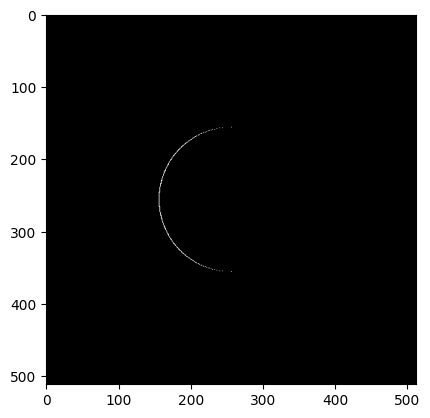

In [12]:
test_frame = np.zeros((512, 512), dtype = np.int32)

# test_frame[path_indices[0], path_indices[1]] = 255
test_frame[path_indices_2[0], path_indices_2[1]] = 255
# test_frame[test_frame>0]=255
x = path_indices_2[0]
y = path_indices_2[1]
# test_frame = cv2.rectangle(test_frame, (x-8, int(y+8)), (x+8, int(y-8)), (255,255,255), -1)

import matplotlib.pyplot as plt

plt.imshow(test_frame, cmap="gray")
plt.show()

In [9]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.7.0 =====================================
  Version control:               4.7.0

  Platform:
    Timestamp:                   2023-02-22T13:19:52Z
    Host:                        Windows 10.0.17763 AMD64
    CMake:                       3.24.2
    CMake generator:             Visual Studio 14 2015
    CMake build tool:            MSBuild.exe
    MSVC:                        1900
    Configuration:               Debug Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (32 files):           + SSSE3 SSE4_1 